In [3]:
import warnings
warnings.simplefilter("ignore")

# Statistics in Python: an introduction

In part adapted from: 
* Gaël Varoquaux [Scipy Lecture](https://scipy-lectures.org/packages/statistics/index.html#linear-models-multiple-factors-and-analysis-of-variance)
* The fMRI course developed by M. Brett and myself
* Many other resources


## Requirements
1. Standard scientific Python environment (numpy, scipy, matplotlib)
2. Pandas
3. [Statsmodels](https://www.statsmodels.org/stable/index.html)
4. [Seaborn](https://seaborn.pydata.org/)

**Disclaimer: Gender questions**

   Some of the examples of this tutorial are chosen around gender 
    questions. The reason is that on such questions controlling the truth
    of a claim actually matters to many people. 


## What this will not cover

* **Bayesian statistics in Python**:

    This chapter does not cover tools for Bayesian statistics.  
    Of particular interest for Bayesian modelling is 
    [PyMC](http://pymc-devs.github.io/pymc),  
    which implements a probabilistic programming language in Python.


* **Read a statistics book**:
   The [Think stats](http://greenteapress.com/wp/think-stats-2e>)  
   book is available as free PDF or in print and is a great 
   introduction to statistics.

Data representation and interaction
====================================

Data as a table
---------------------

The setting that we consider for statistical analysis is that of multiple
*observations* or *samples* described by a set of different *attributes*
or *features*. The data can than be seen as a 2D table, or matrix, with
columns giving the different attributes of the data, and rows the
observations. For instance, the data contained in
[This csv file](https://raw.githubusercontent.com/scipy-lectures/scipy-lecture-notes/master/packages/statistics/examples/brain_size.csv)


The data in this .csv file looks like:
```
"";"Gender";"FSIQ";"VIQ";"PIQ";"Weight";"Height";"MRI_Count"
"1";"Female";133;132;124;"118";"64.5";816932
"2";"Male";140;150;124;".";"72.5";1001121
"3";"Male";139;123;150;"143";"73.3";1038437
"4";"Male";133;129;128;"172";"68.8";965353
"5";"Female";137;132;134;"147";"65.0";951545
```

## The pandas data-frame


We will store and manipulate this data in a
    `pandas.DataFrame`, from the [pandas](http://pandas.pydata.org) module. It is the Python equivalent of
    the spreadsheet table. It is different from a 2D ``numpy`` array as it
    has named columns, can contain a mixture of different data types by
    column, and has elaborate selection and pivotal mechanisms.


### Creating dataframes: reading data files or converting arrays



In [4]:
import pandas

csvfile = ('https://raw.githubusercontent.com/scipy-lectures/'
          'scipy-lecture-notes/master/packages/statistics/examples/brain_size.csv')

data = pandas.read_csv(csvfile, sep=';', index_col=0)

data.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118,64.5,816932
2,Male,140,150,124,.,72.5,1001121
3,Male,139,123,150,143,73.3,1038437
4,Male,133,129,128,172,68.8,965353
5,Female,137,132,134,147,65.0,951545


In [5]:
print('What type is data ? : ', type(data))
print("It stores values in a numpy array:", type(data.values))
data.values[:5]

What type is data ? :  <class 'pandas.core.frame.DataFrame'>
It stores values in a numpy array: <class 'numpy.ndarray'>


array([['Female', 133, 132, 124, '118', '64.5', 816932],
       ['Male', 140, 150, 124, '.', '72.5', 1001121],
       ['Male', 139, 123, 150, '143', '73.3', 1038437],
       ['Male', 133, 129, 128, '172', '68.8', 965353],
       ['Female', 137, 132, 134, '147', '65.0', 951545]], dtype=object)

### warning: Missing values


The weight of the second individual is missing in the CSV file. In this
  particular file, missing values are represented by "`.`". If we don't specify
  the missing value (NA = not available) marker, pandas will not recognize this
  and we will not be able to do statistical analysis.


In [6]:
data = pandas.read_csv(csvfile, sep=';', na_values=".")
data.head(3) #.dropna()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437


## Creating from arrays

A `pandas.DataFrame` can also be seen as a dictionary of 1D 'series', eg arrays or lists. If we have 3
``numpy`` arrays:

In [7]:
import numpy as np
t = np.linspace(-6, 6, 20)
sin_t = np.sin(t)
cos_t = np.cos(t)

# We can expose them as a :class:`pandas.DataFrame`::
pandas.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t}).head(4)

# Question : what is the first argument ? 

,t,sin,cos
0,-6.000000,0.279415,0.960170
1,-5.368421,0.792419,0.609977
2,-4.736842,0.999701,0.024451
3,-4.105263,0.821291,-0.570509


## Manipulating data


In [8]:
print('data.shape: ', data.shape)
print('data.columns: ',data.columns)  # It has columns
print('\nFemale VIQ mean: ', data[data['Gender'] == 'Female']['VIQ'].mean())

data.describe()

data.shape:  (40, 8)
data.columns:  Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

Female VIQ mean:  109.45


,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,20.500000,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,11.690452,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,1.000000,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,10.750000,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,20.500000,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,30.250000,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,40.000000,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


In [9]:
# Question: Will we get the same results with : 
# `data.dropna().describe()` ?

In [10]:
# "Group by"
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', 109.45)
('Male', 115.25)


In [11]:
type(groupby_gender)

pandas.core.groupby.groupby.DataFrameGroupBy

In [12]:
data.loc[data['Gender'] == 'Female', 'VIQ'] += 1

In [13]:
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

data['VIQ'] += 1

# Question : what if we look at the groupby_gender object ? 

('Female', 110.45)
('Male', 115.25)


In [14]:
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', 111.45)
('Male', 116.25)


* What is the mean value for VIQ for the full population?
* How many males/females were included in this study?

  **Hint** use 'tab completion' to find out the methods that can be
  called, instead of 'mean' in the above example.

* What is the average value of MRI counts expressed in log units, for
  males and females?


## Plotting data


In [15]:
from pandas import plotting as pdplt
pdplt.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']]);

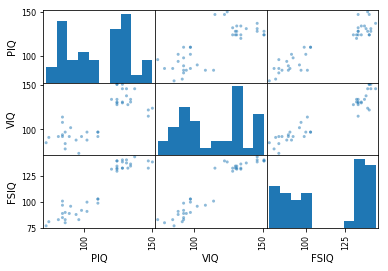

In [16]:
pdplt.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']]);

The IQ metrics are bimodal, as if there are 2 sub-populations.

# Hypothesis testing: comparing two groups


For simple statistical tests:

https://en.wikipedia.org/wiki/Statistical_hypothesis_testing

we will use the `scipy.stats` sub-module of [scipy](http://docs.scipy.org/doc/)



In [17]:
from scipy import stats
from scipy import stats as sst

Cohen's d effect size : 

$\hspace{3cm} d = \frac{\mu}{\sigma}$

$\mu$ the non normalized effect size, $\sigma$ the standard deviation of the **data**

Author report: APOE effect on hippocampal volume has a p value of 6.6311e-10, n=733
What is the effect size of APOE on the hippocampal volume ?


In [19]:
# create a normal(0,1) variable 
n01 = sst.norm(0,1.)
# n01 = sst.t(df=733)

z = n01.isf(6.6311e-10)

#wat = n01.cdf(6.6311e-10)

d = n01.isf(6.6311e-10)/np.sqrt(733)
print("z = {:4.3f} d = {:4.3f}".format(z,d))

z = 6.064 d = 0.224


In [20]:
n01.rvs(size=(3,3))

array([[-0.87343749,  0.19866176,  1.10709082],
       [ 0.86064376,  1.60432105, -1.70504822],
       [-1.00520183, -0.21020969,  0.06071348]])

[Text(0,0.5,'Frequency'), Text(0.5,0,'Uniform Distribution ')]

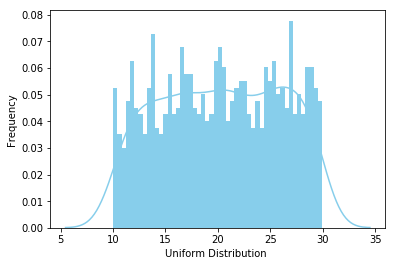

In [21]:
# scipy stats has a great number of distribution, all with pdf cdf, sf, isf, etc ...  
# but you can also sample from these: 
n, start, width = 1000, 10, 20
unif10_20 = sst.uniform(loc=start,scale=width)
data_uniform = unif10_20.rvs(size=(n,))

import seaborn as sns
ax = sns.distplot(data_uniform,
                  bins=50,
#                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

## Student's t-test: the simplest statistical test


`scipy.stats.ttest_1samp` tests if the population mean of data is
likely to be equal to a given value (technically if observations are
drawn from a Gaussian distributions of given population mean). It returns
the [T statistic](https://en.wikipedia.org/wiki/Student%27s_t-test),
and the [p-value](https://en.wikipedia.org/wiki/P-value) (see the
function's help)

In [22]:
stats.ttest_1samp(data['VIQ'], 0)

Ttest_1sampResult(statistic=30.5643761507487, pvalue=7.3798528645483e-29)

### Definition of a p-value


Probability of observing a statistic equal to the one seen 
in the data, or one that is more extreme, when the null 
hypothesis is true


Requires:
* Knowledge of the null hypothesis
* Choice of a statistic
* Concept of repeating the whole study in the same way
    - Same study design
    - Same sampling scheme
    - Same definition of the statistic

### 2-sample t-test: testing for difference across populations

We have seen above that the mean VIQ in the  male and  
female populations were different. To test if this is  
significant, we do a 2-sample t-test with  

`scipy.stats.ttest_ind`



In [25]:
np.set_printoptions(precision=4) # he non !

female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)   

#stats.ttest_ind?

Ttest_indResult(statistic=-0.6394064874434492, pvalue=0.5263946181763066)

### Paired tests: repeated measurements on the same individuals

PIQ, VIQ, and FSIQ give 3 measures of IQ.  
Let us test if FISQ and PIQ are significantly  
different. We can use a 2 sample test


{'Female': Int64Index([0, 4, 5, 6, 7, 10, 13, 14, 15, 16, 18, 22, 24, 26, 28, 29, 30, 34,
             35, 37],
            dtype='int64'),
 'Male': Int64Index([1, 2, 3, 8, 9, 11, 12, 17, 19, 20, 21, 23, 25, 27, 31, 32, 33, 36,
             38, 39],
            dtype='int64')}

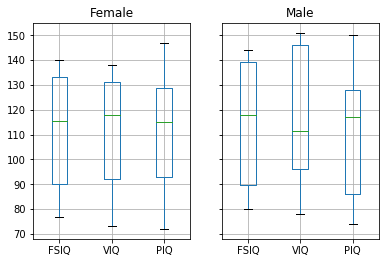

In [27]:
# Box plots of different columns for each gender
groupby_gender.boxplot(column=['FSIQ', 'VIQ', 'PIQ'])
groupby_gender.groups

In [29]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])

# Can you see a problem with this approach ?

Ttest_indResult(statistic=0.465637596380964, pvalue=0.6427725009414841)

The problem with this approach is that it forgets that there are links between  
observations: FSIQ and PIQ are measured on the same individuals. Thus the  
variance due to inter-subject variability is confounding, and can be removed,  
using a "paired test", or ["repeated measures test"](https://en.wikipedia.org/wiki/Repeated_measures_design)  

In [30]:
# considering that FSIQ and PIQ come from the same participants:

stats.ttest_rel(data['FSIQ'], data['PIQ'])

Ttest_relResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

In [33]:
# This is equivalent to a 1-sample test on the difference:

stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)

# stats.ttest_1samp?

Ttest_1sampResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

T-tests assume Gaussian errors.  

We can use a [Wilcoxon signed-rank test](https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test) that relaxes this assumption:


In [34]:
stats.wilcoxon(data['FSIQ'], data['PIQ'])

WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)

### Exercise

* Test the difference between weights in males and females.
* Use non parametric statistics to test the difference  
  between VIQ in males and females.

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     3.809
Date:                Wed, 13 May 2020   Prob (F-statistic):             0.0184
Time:                        19:05:44   Log-Likelihood:                -172.34
No. Observations:                  39   AIC:                             352.7
Df Residuals:                      35   BIC:                             359.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        166.6258     88.824      1.

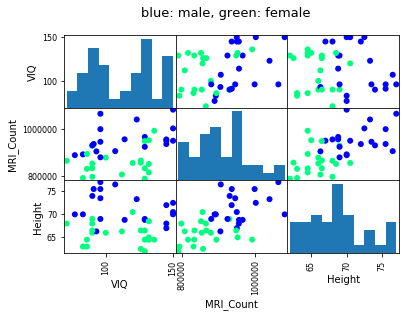

In [38]:
import pandas
from statsmodels.formula.api import ols

data = pandas.read_csv(csvfile, sep=';', na_values='.')

model = ols('VIQ ~ Gender + MRI_Count + Height', data).fit()
print(model.summary())

# Here, we don't need to define a contrast, as we are testing a single
# coefficient of our model, and not a combination of coefficients.
# However, defining a contrast, which would then be a 'unit contrast',
# will give us the same results
print(model.f_test([0, 1, 0, 0]))

###############################################################################
# Here we plot a scatter matrix to get intuitions on our results.
# This goes beyond what was asked in the exercise

# This plotting is useful to get an intuitions on the relationships between
# our different variables

from pandas.tools import plotting
import matplotlib.pyplot as plt

# Fill in the missing values for Height for plotting
data['Height'].fillna(method='pad', inplace=True)

# The parameter 'c' is passed to plt.scatter and will control the color
# The same holds for parameters 'marker', 'alpha' and 'cmap', that
# control respectively the type of marker used, their transparency and
# the colormap
plotting.scatter_matrix(data[['VIQ', 'MRI_Count', 'Height']],
                        c=(data['Gender'] == 'Female'), marker='o',
                        alpha=1, cmap='winter')

fig = plt.gcf()
fig.suptitle("blue: male, green: female", size=13)

plt.show()

# Linear models, multiple factors, and analysis of variance

## "formulas" to specify statistical models in Python

### A simple linear regression


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Wed, 13 May 2020   Prob (F-statistic):           8.56e-08
Time:                        19:07:43   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

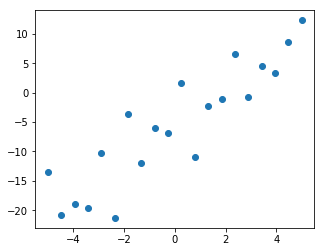

In [39]:
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Generate and show the data
x = np.linspace(-5, 5, 20)

# To get reproducible values, provide a seed value
np.random.seed(1)

y = -5 + 3*x + 4 * np.random.normal(size=x.shape)

# Plot the data
plt.figure(figsize=(5, 4))
plt.plot(x, y, 'o')

#############################################################
# Multilinear regression model, calculating fit, P-values,
# confidence intervals etc.

# Convert the data into a Pandas DataFrame to use the formulas 
# framework in statsmodels
data = pandas.DataFrame({'x': x, 'y': y})

# Fit the model
model = ols("y ~ x", data).fit()

# Print the summary
print(model.summary())

# Peform analysis of variance on fitted linear model
# anova_results = anova_lm(model)

#print('\nANOVA results')
#print(anova_results)

Statsmodels uses a statistical terminology: the `y` variable in
statsmodels is called 'endogenous' while the `x` variable is called
exogenous.  This is discussed in more detail in  
http://statsmodels.sourceforge.net/devel/endog_exog.html

To simplify, `y` (endogenous) is the value you are trying to predict,
while `x` (exogenous) represents the features you are using to make
the prediction.


Retrieve the estimated parameters from the model above. 


   **Hint**: use tab-completion to find the relevent attribute.


## Categorical variables: comparing groups or multiple categories


In [25]:
# remember, we modified "data" !
data = pandas.read_csv(csvfile, sep=';', na_values=".")

In [26]:
model = ols("VIQ ~ Gender + 1", data)
modelfit = model.fit()
print(modelfit.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Tue, 12 May 2020   Prob (F-statistic):              0.445
Time:                        20:02:52   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

In [28]:
model.exog_names

['Intercept', 'Gender[T.Male]']

**Forcing categorical**:

the 'Gender' is automatically detected as a
categorical variable, and thus each of its different values are
treated as different entities.

An integer column can be forced to be treated as categorical using:

    model = ols('VIQ ~ C(Gender)', data).fit()


**Intercept**:

We can remove the intercept using `- 1` in the formula,
or force the use of an intercept using `+ 1`.


By default, statsmodels treats a categorical variable with K possible
values as K-1 'dummy' boolean variables (the last level being
absorbed into the intercept term).  This is almost always a good
default choice - however, it is possible to specify different
encodings for categorical variables
(http://statsmodels.sourceforge.net/devel/contrasts.html).



**Link to t-tests between different FSIQ and PIQ**

In [29]:
# To compare different types of IQ, we need to create a "long-form"
# table, listing IQs, where the type of IQ is indicated by a
# categorical variable::

data_fisq = pandas.DataFrame({'iq': data['FSIQ'], 'type': 'fsiq'})
data_piq = pandas.DataFrame({'iq': data['PIQ'], 'type': 'piq'})
data_long = pandas.concat((data_fisq, data_piq))

# print(data_long)

In [30]:
model = ols("iq ~ type", data_long).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     iq   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2168
Date:                Tue, 12 May 2020   Prob (F-statistic):              0.643
Time:                        19:52:14   Log-Likelihood:                -364.35
No. Observations:                  80   AIC:                             732.7
Df Residuals:                      78   BIC:                             737.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     113.4500      3.683     30.807      

In [31]:
# same values 
stats.ttest_ind(data['PIQ'], data['FSIQ']) 

Ttest_indResult(statistic=-0.465637596380964, pvalue=0.6427725009414841)


 Going back to the brain size + IQ data, test if the VIQ of male and
 female are different after removing the effect of brain size, height
   and weight.
```

In [32]:
data = pandas.read_csv(csvfile, sep=';', na_values=".")
data.columns

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

In [33]:
modelfit = ols("VIQ ~ Weight + Height + MRI_Count + Gender", data).fit()
modelfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    VIQ   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     2.733
Date:                Tue, 12 May 2020   Prob (F-statistic):             0.0455
Time:                        19:52:15   Log-Likelihood:                -167.03
No. Observations:                  38   AIC:                             344.1
Df Residuals:                      33   BIC:                             352.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        169.7719     90.054      1.885      0.068     -13.443     352.987
Gender[T.Male]    10.1579     10.891      0.933      0.358     -12.001      32.317
Weight            -0.1427      0.215     -0.665      0.511      -0.579       0.294
Height            -2.7337      1.410     -1.938      0.061      -5.603       0.136
MRI_Count          0.0002   6.48e-05      2.489      0.018    2.94e-05       0.000
==============================================================================
Omnibus:                        5.002   Durbin-Watson:                   2.272
Prob(Omnibus):                  0.082   Jarque-Bera (JB):                1.892
Skew:                          -0.066   Prob(JB):                        0.388
Kurtosis:                       1.915   Cond. No.                     2.41e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
modelfit = ols("VIQ ~ Weight + Height + MRI_Count*Gender - 1", data).fit()
modelfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    VIQ   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     2.166
Date:                Tue, 12 May 2020   Prob (F-statistic):             0.0827
Time:                        19:52:15   Log-Likelihood:                -166.92
No. Observations:                  38   AIC:                             345.8
Df Residuals:                      32   BIC:                             355.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Gender[Female]             198.4123    114.298      1.736      0.092     -34.405     431.230
Gender[Male]               157.0996    113.139      1.389      0.175     -73.358     387.557
Weight                      -0.1110      0.230     -0.482      0.633      -0.580       0.358
Height                      -2.8852      1.474     -1.957      0.059      -5.888       0.117
MRI_Count                    0.0001   9.18e-05      1.465      0.153   -5.25e-05       0.000
MRI_Count:Gender[T.Male]  5.637e-05      0.000      0.416      0.680      -0.000       0.000
==============================================================================
Omnibus:                        5.161   Durbin-Watson:                   2.315
Prob(Omnibus):                  0.076   Jarque-Bera (JB):                1.905
Skew:                          -0.037   Prob(JB):                        0.386
Kurtosis:                       1.906   Cond. No.                     4.10e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.1e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
print(modelfit.f_test([1, -1, 0, 0, 0, 0]))
print(modelfit.f_test([[0, 0, 1, 0, 0, 0],[0, 0, 0, 1, 0, 0]]))  

<F test: F=array([[0.1105]]), p=0.7417740374529984, df_denom=32, df_num=1>
<F test: F=array([[3.2414]]), p=0.05225463463248599, df_denom=32, df_num=2>
